Drawing the corner from numpy.rec file. The benefit is that variable name is in file. Burnin is already applied.

In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
result = np.load('./np_h.npy')
array_2d = result.view((np.float64, len(result.dtype.names)))

/tmp/ipykernel_1656947/2332322712.py:2: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  array_2d = result.view((np.float64, len(result.dtype.names)))


In [5]:
import seaborn as sns

<Axes: ylabel='Count'>

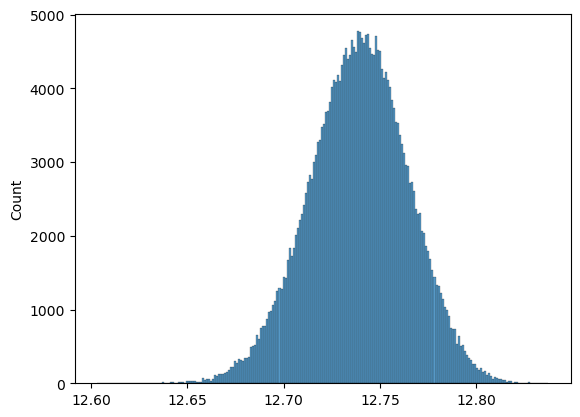

In [3]:
sns.histplot(array_2d)

In [4]:
fig = corner.corner(array_2d, labels=result.dtype.names, show_titles=True, color='orange', truths=np.percentile(array_2d, 50, axis=0))

# This will not work for 1-d mcmc; just use sns.histplot to plot it.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
from read_files import *
from calc_wp import w_p

In [10]:
wp_table = read_wp('../wp_table')
rp, signal = read_signal('../signal_high.npy')
cov = read_cov('../cov_high.npy')
cov_inv = np.linalg.inv(cov)
logM, Nh = read_halo_mass_function('../halo_mass_function.npy')

sep_min = 0.1
sep_max = 100
sep_N = 30

r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)

rp0 = (r_pbins[1:]*r_pbins[:-1])**0.5
interpolate_table(wp_table, rp, rp0)

In [11]:
from run_mcmc import HODParameter

In [12]:
para = HODParameter()
read_config('./config_fix_sig.yaml', para)

{'Nwalkers': 40,
 'Nstep': 8000,
 'Nburnin': 800,
 'Npro': 40,
 'backend_file': None,
 'numpy_file': 'np_l',
 'wp_table_path': '../'}

In [14]:
predict = w_p(logM, Nh, para.full_parameters(np.atleast_1d(np.percentile(array_2d, 50))), wp_table)

In [15]:
n = len(rp)
auto = signal[:n]
cross = signal[n:]
auto_err = np.sqrt([cov[i,i] for i in range(n)])
cross_err = np.sqrt([cov[i,i] for i in range(n, n*2)])

[]

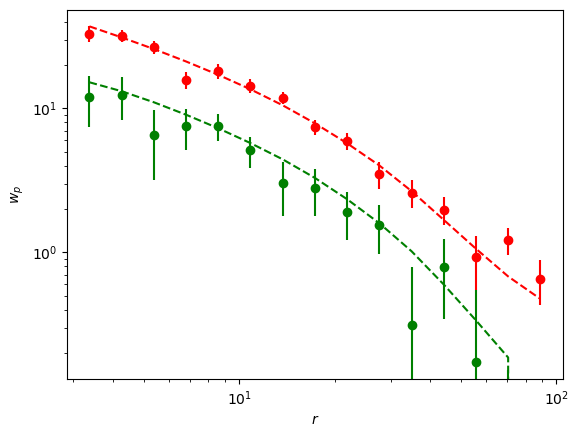

In [17]:
plt.errorbar(rp, auto, auto_err, fmt='ro')
plt.errorbar(rp, cross, cross_err, fmt='go')
plt.plot(rp, predict[:n], 'r--')
plt.plot(rp, predict[n:], 'g--')
plt.xlabel('$r$')
plt.ylabel('$w_p$')
plt.loglog()

In [5]:
rp, signal_h = read_signal('../signal_high.npy')
rp, signal_l = read_signal('../signal_low.npy')

In [8]:
delta_w = signal_l[:len(signal_l)//2] - signal_h[:len(signal_l)//2]

In [ ]:
plt.plot()

[]

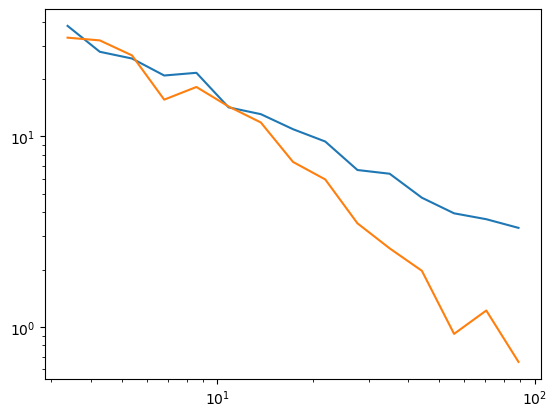

In [10]:
plt.plot(rp, signal_l[:len(signal_l)//2])
plt.plot(rp, signal_h[:len(signal_l)//2])
plt.loglog()

[]

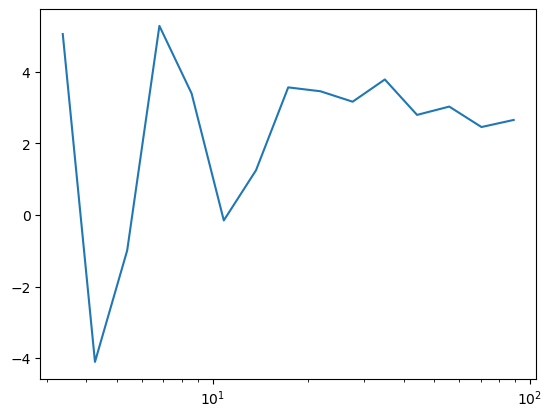

In [9]:
plt.plot(rp, delta_w)
plt.semilogx()